<a href="https://colab.research.google.com/github/KarolMc/msc_dissertation/blob/main/XGBoost_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib

import pandas as pd
import numpy as np

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer

import random

random_seed = random.seed(42)

from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv('/notebooks/Data/multiselected_data/X_train_multiselected.csv', index_col=[0])
y_train = pd.read_csv('/notebooks/Data/y_train_SMOV.csv', index_col=[0])
X_test = pd.read_csv('/notebooks/Data/multiselected_data/X_test_multiselected.csv', index_col=[0])
y_test = pd.read_csv('/notebooks/Data/y_test.csv', index_col=[0])

train_features = X_train.columns


le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.fit_transform(y_test)

X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size=0.25)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train_val,'Y_train':y_train_val,
                'X_val': X_validation,'Y_val':y_validation,
                'X_test': X_test,'Y_test':y_test}

In [ ]:


import xgboost as xgb
import matplotlib.pyplot as plt

#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    y_pred = sk_model.predict(training_data['X_test'])
    print('XGBoost Accuracy: '+str(accuracy_score(y_pred, training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(y_pred, training_data['Y_test'],average='macro')))
    plot_compare(metrics,store,epochs)
    features = train_features
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(training_data['Y_test'], y_pred, target_names=target_names))
    cm = confusion_matrix(training_data['Y_test'], y_pred, labels=sk_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sk_model.classes_).plot()
    plt.show()
    



In [ ]:
from xgboost.sklearn import XGBClassifier


In [ ]:

# create a GPU XGBoost classifier
xgb_base = xgb.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed, 
    eval_metric=["mlogloss", "auc"], 
    objective = 'multi:softprob',
    num_class = 3,
    verbosity = 3
)


Fitting model...
[10:08:12] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:08:12] ======== Monitor (0): SketchContainer ========
[10:08:12] MakeCuts: 0.000315s, 1 calls @ 315us

[10:08:12] Prune: 0.000204s, 1 calls @ 204us

[10:08:12] ScanInput: 0.000547s, 1 calls @ 547us

[10:08:12] Unique: 0.000145s, 1 calls @ 145us

[10:08:14] ======== Monitor (0): Learner ========
[10:08:14] Configure: 1e-06s, 1 calls @ 1us

[10:08:14] EvalOneIter: 0.000795s, 100 calls @ 795us

[10:08:14] GetGradient: 0.004128s, 100 calls @ 4128us

[10:08:14] PredictRaw: 0.270709s, 100 calls @ 270709us

[10:08:14] UpdateOneIter: 1.41416s, 100 calls @ 1414164us

[10:08:14] ======== Monitor (0): GBTree ========
[10:08:14] BoostNewTrees: 1.48187s, 100 calls @ 1481866us

[10:08:14] CommitModel: 0.000135s, 100 calls @ 135us

[10:08:14] ======== Device 0 Memory Allocations:  ========
[10:08:14] Peak memory usage: 61MiB
[10:08:14] Number of allocations: 52593
[10:08:14] ======== Monitor (0): updater

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[100]	val-mlogloss:0.27716	val-merror:0.11357	train-mlogloss:0.14125	train-merror:0.02754
[200]	val-mlogloss:0.23950	val-merror:0.09944	train-mlogloss:0.05800	train-merror:0.00223
[299]	val-mlogloss:0.22850	val-merror:0.09396	train-mlogloss:0.02569	train-merror:0.00007
[10:08:18] ======== Monitor (0): Learner ========
[10:08:18] Configure: 0.000341s, 1 calls @ 341us

[10:08:18] EvalOneIter: 0.156118s, 300 calls @ 156118us

[10:08:18] GetGradient: 0.00956s, 300 calls @ 9560us

[10:08:18] PredictRaw: 0.000683s, 300 calls @ 683us

[10:08:18] UpdateOneIter: 4.263s, 300 calls @ 4262997us

[10:08:18] ======== Monitor (0): GBTree ========
[10:08:18] BoostNewTrees: 4.24668s, 300 calls @ 4246677us

[10:08:18] CommitModel: 0.000383s, 300 calls @ 383us

[10:08:18] ======== Device 0 Memory Allocations:  ========
[10:08:18] Peak memory usage: 61MiB
[10:08:18] Number of allocations: 216732
[10:08:18] ======== Monitor (0): updater_gpu_hist ========
[10:08:18] InitData: 0.035549s, 900 calls @ 35549us


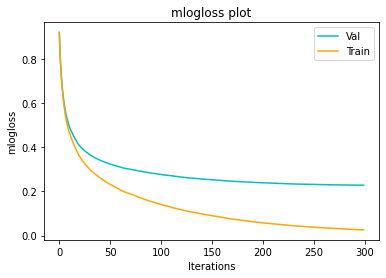

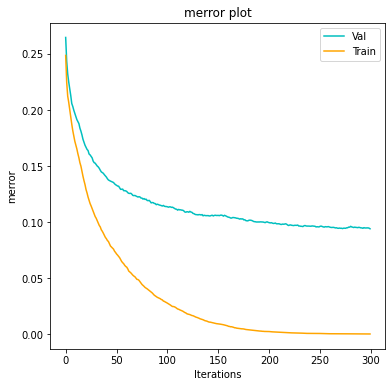

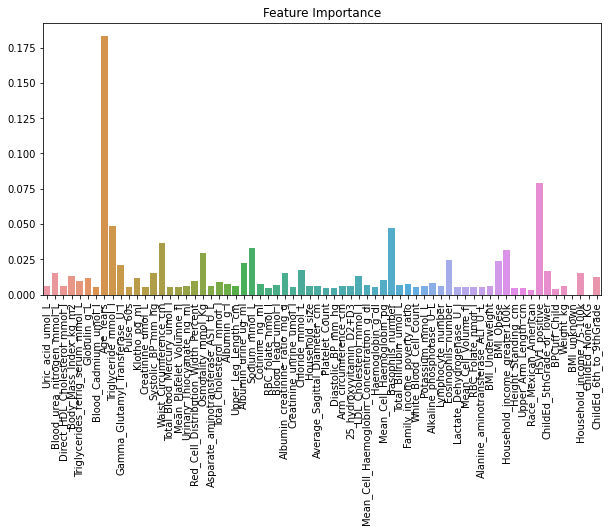

              precision    recall  f1-score   support

     class 0       0.88      0.89      0.89      8396
     class 1       0.57      0.56      0.57      2728
     class 2       0.71      0.64      0.67      1054

    accuracy                           0.80     12178
   macro avg       0.72      0.70      0.71     12178
weighted avg       0.80      0.80      0.80     12178



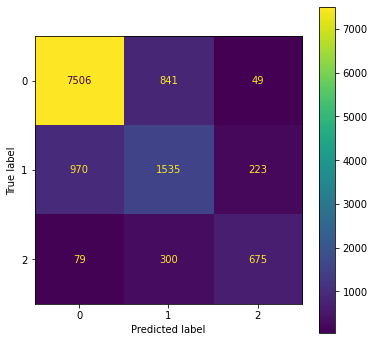

[10:08:19] ======== Monitor (0): ellpack_page ========
[10:08:19] BinningCompression: 0.004252s, 1 calls @ 4252us

[10:08:19] InitCompressedData: 0.000131s, 1 calls @ 131us

[10:08:19] Quantiles: 0.009852s, 1 calls @ 9852us

[10:08:19] ======== Monitor (0): Learner ========
[10:08:19] ======== Monitor (0):  ========
[10:08:19] ======== Device 0 Memory Allocations:  ========
[10:08:19] Peak memory usage: 61MiB
[10:08:19] Number of allocations: 216733
[10:08:19] ======== Monitor (0):  ========
[10:08:19] ======== NCCL Statistics========
[10:08:19] AllReduce calls: 0
[10:08:19] AllReduce total MiB communicated: 0
CPU times: user 6.84 s, sys: 2.01 s, total: 8.85 s
Wall time: 7.66 s


In [ ]:
%%time

fitXgb(xgb_base, training_data)

In [ ]:
%%time

param_test1 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch1 = GridSearchCV(estimator = xgb_base, param_grid = param_test1, scoring='f1_micro',n_jobs=-1,verbose = 2, cv=3)
gsearch1.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[10:08:47] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:08:48] ======== Monitor (0): SketchContainer ========
[10:08:48] MakeCuts: 0.000996s, 1 calls @ 996us

[10:08:48] Prune: 0.00084s, 1 calls @ 840us

[10:08:48] ScanInput: 0.000454s, 1 calls @ 454us

[10:08:48] Unique: 0.000167s, 1 calls @ 167us

[10:09:00] ======== Monitor (0): Learner ========
[10:09:00] Configure: 1e-06s, 1 calls @ 1us

[10:09:00] EvalOneIter: 0.000877s, 100 calls @ 877us

[10:09:00] GetGradient: 0.064003s, 100 calls @ 64003us

[10:09:00] PredictRaw: 0.427714s, 100 calls @ 427714us

[10:09:00] UpdateOneIter: 12.0131s, 100 calls @ 12013092us

[10:09:00] ======== Monitor (0): GBTree ========
[10:09:00] BoostNewTrees: 12.0423s, 100 calls @ 12042252us

[10:09:00] CommitModel: 0.000152s, 100 calls @ 152us

[10:09:00] ======== Device 0 Memory Allocations:  ========
[10:09:00] Peak memory usage: 41MiB
[10:09:00] Number of allocations: 5

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric=['mlogloss', 'auc'], gamma=0,
                                     gpu_id=0, grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0, num_class=3,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0, ...),
             n_jobs=-1, param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='f1_micro', verbose=2)

In [ ]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best


In [ ]:
getTrainScores(gsearch1)


({0: "mean:0.8810503005378045params{'reg_alpha': 1e-05}",
  1: "mean:0.8817533129459735params{'reg_alpha': 0.01}",
  2: "mean:0.8818060388765862params{'reg_alpha': 0.1}",
  3: "mean:0.8830890365214946params{'reg_alpha': 1}",
  4: "mean:0.8333333333333334params{'reg_alpha': 100}"},
 {'best_mean': 0.8830890365214946, 'best_param': {'reg_alpha': 1}})

Fitting model...
[10:09:50] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:09:50] ======== Monitor (0): SketchContainer ========
[10:09:50] MakeCuts: 0.00034s, 1 calls @ 340us

[10:09:50] Prune: 0.000213s, 1 calls @ 213us

[10:09:50] ScanInput: 0.000527s, 1 calls @ 527us

[10:09:50] Unique: 0.000149s, 1 calls @ 149us

[10:09:52] ======== Monitor (0): Learner ========
[10:09:52] Configure: 0.00041s, 1 calls @ 410us

[10:09:52] EvalOneIter: 0.000618s, 100 calls @ 618us

[10:09:52] GetGradient: 0.003738s, 100 calls @ 3738us

[10:09:52] PredictRaw: 0.005659s, 100 calls @ 5659us

[10:09:52] UpdateOneIter: 1.57742s, 100 calls @ 1577422us

[10:09:52] ======== Monitor (0): GBTree ========
[10:09:52] BoostNewTrees: 1.5659s, 100 calls @ 1565904us

[10:09:52] CommitModel: 0.000126s, 100 calls @ 126us

[10:09:52] ======== Device 0 Memory Allocations:  ========
[10:09:52] Peak memory usage: 61MiB
[10:09:52] Number of allocations: 324175
[10:09:52] ======== Monitor (0): update

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[100]	val-mlogloss:0.27770	val-merror:0.11457	train-mlogloss:0.14217	train-merror:0.02657
[200]	val-mlogloss:0.23835	val-merror:0.09944	train-mlogloss:0.05805	train-merror:0.00148
[299]	val-mlogloss:0.22749	val-merror:0.09422	train-mlogloss:0.02804	train-merror:0.00004
[10:09:57] ======== Monitor (0): Learner ========
[10:09:57] Configure: 0.000336s, 1 calls @ 336us

[10:09:57] EvalOneIter: 0.166787s, 300 calls @ 166787us

[10:09:57] GetGradient: 0.010014s, 300 calls @ 10014us

[10:09:57] PredictRaw: 0.000858s, 300 calls @ 858us

[10:09:57] UpdateOneIter: 4.76751s, 300 calls @ 4767507us

[10:09:57] ======== Monitor (0): GBTree ========
[10:09:57] BoostNewTrees: 4.74986s, 300 calls @ 4749861us

[10:09:57] CommitModel: 0.000392s, 300 calls @ 392us

[10:09:57] ======== Device 0 Memory Allocations:  ========
[10:09:57] Peak memory usage: 61MiB
[10:09:57] Number of allocations: 496378
[10:09:57] ======== Monitor (0): updater_gpu_hist ========
[10:09:57] InitData: 0.036535s, 900 calls @ 3653

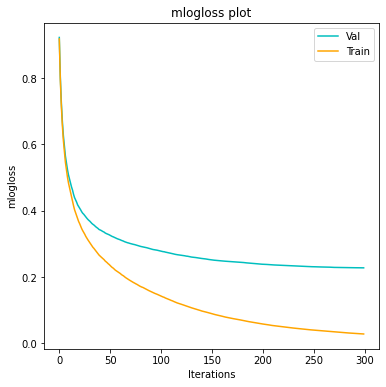

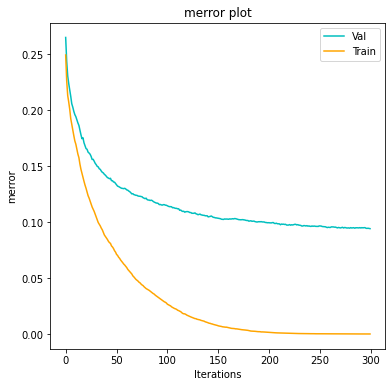

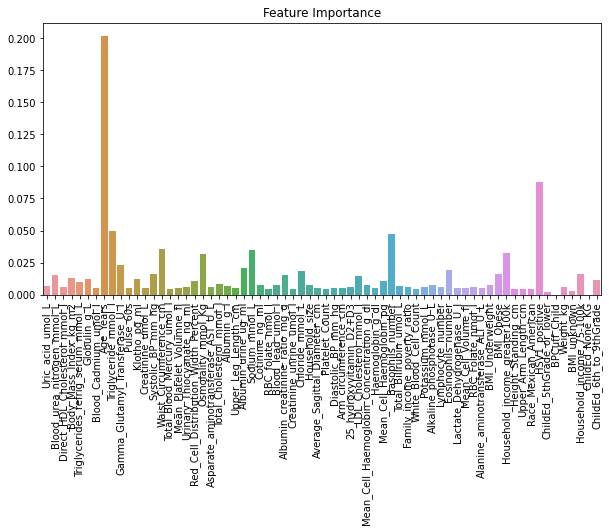

              precision    recall  f1-score   support

     class 0       0.88      0.89      0.89      8396
     class 1       0.58      0.58      0.58      2728
     class 2       0.73      0.64      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.70      0.72     12178
weighted avg       0.80      0.80      0.80     12178



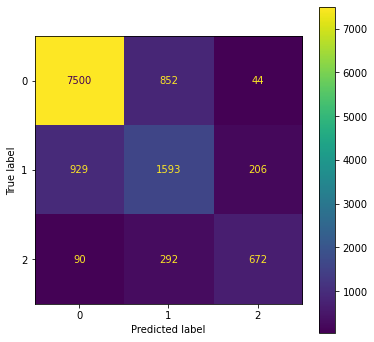

[10:09:58] ======== Monitor (0): ellpack_page ========
[10:09:58] BinningCompression: 0.004851s, 1 calls @ 4851us

[10:09:58] InitCompressedData: 0.000133s, 1 calls @ 133us

[10:09:58] Quantiles: 0.010034s, 1 calls @ 10034us

[10:09:58] ======== Monitor (0): Learner ========
[10:09:58] ======== Monitor (0):  ========
[10:09:58] ======== Device 0 Memory Allocations:  ========
[10:09:58] Peak memory usage: 61MiB
[10:09:58] Number of allocations: 496379
[10:09:58] ======== Monitor (0):  ========
[10:09:58] ======== NCCL Statistics========
[10:09:58] AllReduce calls: 0
[10:09:58] AllReduce total MiB communicated: 0


In [ ]:
xgb2 = xgb.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed,
    reg_alpha = 1,
    eval_metric=["mlogloss", "auc"], 
    objective = 'multi:softprob',
    num_class = 3,
    verbosity = 3
)

fitXgb(xgb2, training_data)

In [ ]:
%%time

param_test2 = {
 'colsample_bytree' :[0.1, 0.3, 0.5, 0.7, 0.9]
}
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = param_test2, scoring='f1_micro',n_jobs=4,verbose = 2, cv=3)
gsearch2.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[10:10:21] Number of allocations: 289139
[10:10:21] ======== Monitor (0): updater_gpu_hist ========
[10:10:21] InitData: 0.047958s, 300 calls @ 47958us

[10:10:21] InitDataOnce: 0.047629s, 1 calls @ 47629us

[10:10:21] Update: 7.37513s, 300 calls @ 7375127us

[10:10:21] UpdatePredictionCache: 0.161891s, 300 calls @ 161891us

[10:10:21] ======== NCCL Statistics========
[10:10:21] AllReduce calls: 8394
[10:10:21] AllReduce total MiB communicated: 1402
[10:10:21] ======== Monitor (0): gradient_based_sampler ========
[10:10:21] Sample: 0.000425s, 300 calls @ 425us

[10:10:21] ======== Monitor (0): GPUHistMakerDevice0 ========
[10:10:21] AllReduce: 0.021746s, 8394 calls @ 21746us

[10:10:21] BuildHist: 0.151762s, 8094 calls @ 151762us

[10:10:21] EvaluateSplits: 0.151443s, 8094 calls @ 151443us

[10:10:21] FinalisePosition: 0.004058s, 300 calls @ 4058us

[10:10:21] InitRoot: 0.503641s, 300 calls @ 503641us

[10:10:21] Reset: 0.9220

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric=['mlogloss', 'auc'], gamma=0,
                                     gpu_id=0, grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0, num_class=3,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='f1_micro', verbose=2)

In [ ]:
getTrainScores(gsearch2)

({0: "mean:0.8432985342191289params{'colsample_bytree': 0.1}",
  1: "mean:0.8729480825336567params{'colsample_bytree': 0.3}",
  2: "mean:0.8772188829132834params{'colsample_bytree': 0.5}",
  3: "mean:0.880540616541882params{'colsample_bytree': 0.7}",
  4: "mean:0.8813315055010721params{'colsample_bytree': 0.9}"},
 {'best_mean': 0.8813315055010721, 'best_param': {'colsample_bytree': 0.9}})

Fitting model...
[10:12:40] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:12:40] ======== Monitor (0): SketchContainer ========
[10:12:40] MakeCuts: 0.000329s, 1 calls @ 329us

[10:12:40] Prune: 0.000207s, 1 calls @ 207us

[10:12:40] ScanInput: 0.000543s, 1 calls @ 543us

[10:12:40] Unique: 0.000142s, 1 calls @ 142us

[10:12:42] ======== Monitor (0): Learner ========
[10:12:42] Configure: 0.000483s, 1 calls @ 483us

[10:12:42] EvalOneIter: 0.000485s, 100 calls @ 485us

[10:12:42] GetGradient: 0.003594s, 100 calls @ 3594us

[10:12:42] PredictRaw: 0.005627s, 100 calls @ 5627us

[10:12:42] UpdateOneIter: 1.56175s, 100 calls @ 1561748us

[10:12:42] ======== Monitor (0): GBTree ========
[10:12:42] BoostNewTrees: 1.55058s, 100 calls @ 1550579us

[10:12:42] CommitModel: 0.000121s, 100 calls @ 121us

[10:12:42] ======== Device 0 Memory Allocations:  ========
[10:12:42] Peak memory usage: 61MiB
[10:12:42] Number of allocations: 658580
[10:12:42] ======== Monitor (0): upd

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[100]	val-mlogloss:0.27977	val-merror:0.11426	train-mlogloss:0.14615	train-merror:0.02831
[200]	val-mlogloss:0.24079	val-merror:0.09849	train-mlogloss:0.06142	train-merror:0.00206
[299]	val-mlogloss:0.22857	val-merror:0.09296	train-mlogloss:0.02915	train-merror:0.00004
[10:12:47] ======== Monitor (0): Learner ========
[10:12:47] Configure: 0.000356s, 1 calls @ 356us

[10:12:47] EvalOneIter: 0.164763s, 300 calls @ 164763us

[10:12:47] GetGradient: 0.010117s, 300 calls @ 10117us

[10:12:47] PredictRaw: 0.000734s, 300 calls @ 734us

[10:12:47] UpdateOneIter: 4.80874s, 300 calls @ 4808738us

[10:12:47] ======== Monitor (0): GBTree ========
[10:12:47] BoostNewTrees: 4.79186s, 300 calls @ 4791856us

[10:12:47] CommitModel: 0.000375s, 300 calls @ 375us

[10:12:47] ======== Device 0 Memory Allocations:  ========
[10:12:47] Peak memory usage: 61MiB
[10:12:47] Number of allocations: 832575
[10:12:47] ======== Monitor (0): updater_gpu_hist ========
[10:12:47] InitData: 0.035439s, 900 calls @ 3543

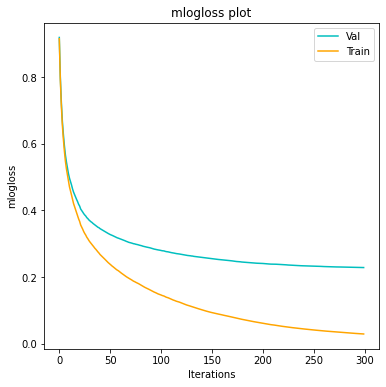

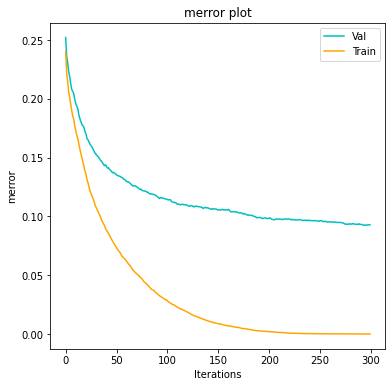

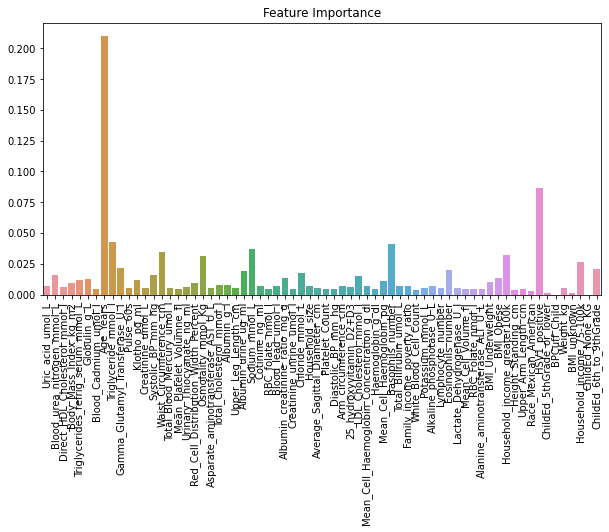

              precision    recall  f1-score   support

     class 0       0.88      0.90      0.89      8396
     class 1       0.59      0.58      0.58      2728
     class 2       0.72      0.64      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.71      0.72     12178
weighted avg       0.80      0.80      0.80     12178



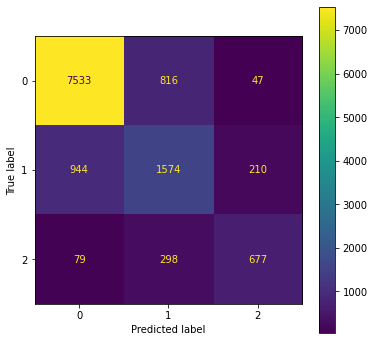

[10:12:48] ======== Monitor (0): ellpack_page ========
[10:12:48] BinningCompression: 0.004245s, 1 calls @ 4245us

[10:12:48] InitCompressedData: 0.000143s, 1 calls @ 143us

[10:12:48] Quantiles: 0.009946s, 1 calls @ 9946us

[10:12:48] ======== Monitor (0): Learner ========
[10:12:48] ======== Monitor (0):  ========
[10:12:48] ======== Device 0 Memory Allocations:  ========
[10:12:48] Peak memory usage: 61MiB
[10:12:48] Number of allocations: 832576
[10:12:48] ======== Monitor (0):  ========
[10:12:48] ======== NCCL Statistics========
[10:12:48] AllReduce calls: 0
[10:12:48] AllReduce total MiB communicated: 0


In [ ]:
xgb3 = xgb.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed,
    reg_alpha = 1,
    colsample_bytree= 0.9,
    eval_metric=["mlogloss", "auc"], 
    objective = 'multi:softprob',
    num_class = 3,
    verbosity = 3
)
fitXgb(xgb3, training_data)

In [ ]:
%%time

param_test3 = {
 'colsample_bylevel' :[0.1, 0.3, 0.5, 0.7, 0.9]
}
gsearch3 = GridSearchCV(estimator = xgb3, param_grid = param_test3, scoring='f1_micro',n_jobs=4,verbose = 10, cv=3)
gsearch3.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[10:11:46] ======== Monitor (0): updater_gpu_hist ========
[10:11:46] ======== NCCL Statistics========
[10:11:46] AllReduce calls: 0
[10:11:46] AllReduce total MiB communicated: 0
[10:11:46] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:11:46] ======== Monitor (0): SketchContainer ========
[10:11:46] MakeCuts: 0.005439s, 1 calls @ 5439us

[10:11:46] Prune: 0.003363s, 1 calls @ 3363us

[10:11:46] ScanInput: 0.002469s, 1 calls @ 2469us

[10:11:46] Unique: 0.002868s, 1 calls @ 2868us

[10:11:54] ======== Monitor (0): Learner ========
[10:11:54] Configure: 0.000404s, 1 calls @ 404us

[10:11:54] EvalOneIter: 0.000704s, 100 calls @ 704us

[10:11:54] GetGradient: 0.033977s, 100 calls @ 33977us

[10:11:54] PredictRaw: 0.000556s, 100 calls @ 556us

[10:11:54] UpdateOneIter: 8.04615s, 100 calls @ 8046146us

[10:11:54] ======== Monitor (0): GBTree ========
[10:11:54] BoostNewTrees: 8.00892s, 100 calls @ 8008919us


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=0.9,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric=['mlogloss', 'auc'], gamma=0,
                                     gpu_id=0, grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0, num_class=3,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0, ...),
             n_jobs=4,
             param_grid={'colsample_bylevel': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='f1_micro', verbose=10)

In [ ]:
getTrainScores(gsearch3)

({0: "mean:0.8635804421948047params{'colsample_bylevel': 0.1}",
  1: "mean:0.8754965025132694params{'colsample_bylevel': 0.3}",
  2: "mean:0.8777285669092061params{'colsample_bylevel': 0.5}",
  3: "mean:0.8803648634398398params{'colsample_bylevel': 0.7}",
  4: "mean:0.8803297128194312params{'colsample_bylevel': 0.9}"},
 {'best_mean': 0.8803648634398398, 'best_param': {'colsample_bylevel': 0.7}})

Fitting model...
[10:16:33] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:16:33] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_by_level" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:16:33] ======== Monitor (0): SketchContainer ========
[10:16:33] MakeCuts: 0.000343s, 1 calls @ 343us

[10:16:33] Prune: 0.000216s, 1 calls @ 216us

[10:16:33] ScanInput: 0.000567s, 1 calls @ 567us

[10:16:33] Unique: 0.000149s, 1 calls @ 149us

[10:16:34] ======== Monitor (0): Learner ========
[10:16:34] Configure: 0.000414s, 1 calls @ 414us

[10:16:34] EvalOneIter: 0.000532s, 100 calls @ 532us

[10:16:34] GetGradient: 0.003512s, 100 calls @ 3512us

[10:16:34] PredictRaw: 0.005643s, 100 calls @ 5643us

[10:16:34] UpdateOneIter

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[100]	val-mlogloss:0.27977	val-merror:0.11426	train-mlogloss:0.14615	train-merror:0.02831
[200]	val-mlogloss:0.24079	val-merror:0.09849	train-mlogloss:0.06142	train-merror:0.00206
[299]	val-mlogloss:0.22857	val-merror:0.09296	train-mlogloss:0.02915	train-merror:0.00004
[10:16:40] ======== Monitor (0): Learner ========
[10:16:40] Configure: 0.000438s, 1 calls @ 438us

[10:16:40] EvalOneIter: 0.160207s, 300 calls @ 160207us

[10:16:40] GetGradient: 0.009742s, 300 calls @ 9742us

[10:16:40] PredictRaw: 0.000721s, 300 calls @ 721us

[10:16:40] UpdateOneIter: 4.7378s, 300 calls @ 4737798us

[10:16:40] ======== Monitor (0): GBTree ========
[10:16:40] BoostNewTrees: 4.72116s, 300 calls @ 4721160us

[10:16:40] CommitModel: 0.000379s, 300 calls @ 379us

[10:16:40] ======== Device 0 Memory Allocations:  ========
[10:16:40] Peak memory usage: 62MiB
[10:16:40] Number of allocations: 1117124
[10:16:40] ======== Monitor (0): updater_gpu_hist ========
[10:16:40] InitData: 0.035566s, 900 calls @ 35566

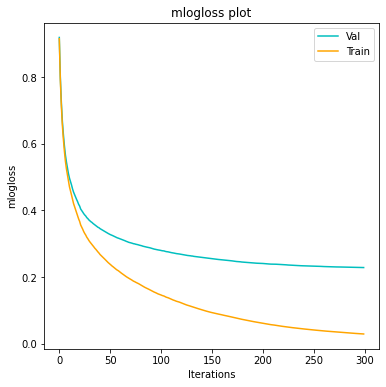

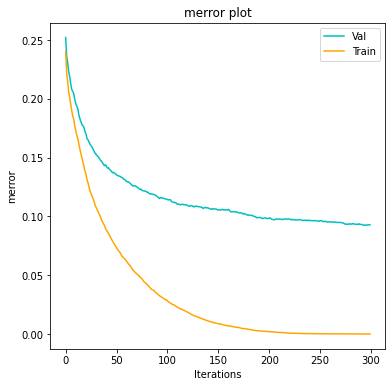

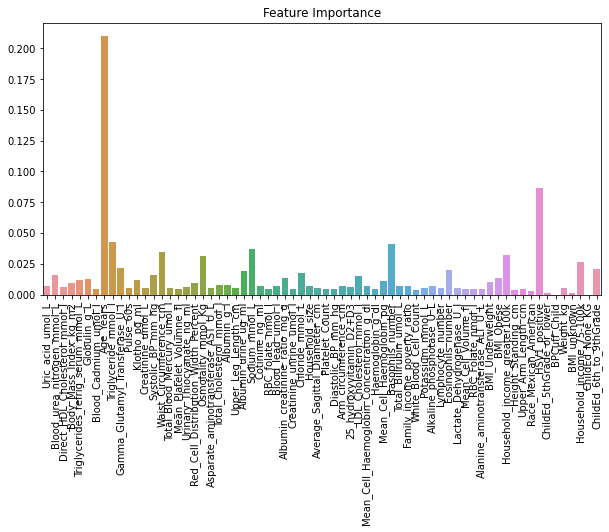

              precision    recall  f1-score   support

     class 0       0.88      0.90      0.89      8396
     class 1       0.59      0.58      0.58      2728
     class 2       0.72      0.64      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.71      0.72     12178
weighted avg       0.80      0.80      0.80     12178



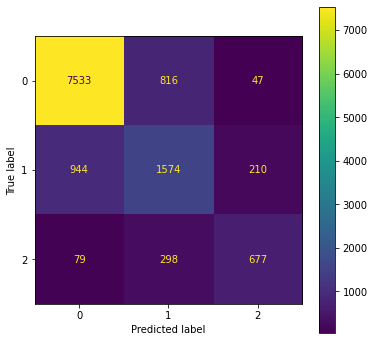

[10:16:41] ======== Monitor (0): ellpack_page ========
[10:16:41] BinningCompression: 0.004364s, 1 calls @ 4364us

[10:16:41] InitCompressedData: 0.000142s, 1 calls @ 142us

[10:16:41] Quantiles: 0.009645s, 1 calls @ 9645us

[10:16:41] ======== Monitor (0): Learner ========
[10:16:41] ======== Monitor (0):  ========
[10:16:41] ======== Device 0 Memory Allocations:  ========
[10:16:41] Peak memory usage: 62MiB
[10:16:41] Number of allocations: 1117125
[10:16:41] ======== Monitor (0):  ========
[10:16:41] ======== NCCL Statistics========
[10:16:41] AllReduce calls: 0
[10:16:41] AllReduce total MiB communicated: 0


In [ ]:
xgb4 = xgb.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed,
    reg_alpha = 1,
    colsample_bytree= 0.9,
    colsample_by_level = 0.7,
    eval_metric=["mlogloss", "auc"], 
    objective = 'multi:softprob',
    num_class = 3,
    verbosity = 3
)


fitXgb(xgb4, training_data)

In [ ]:
%%time

param_test4 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch4 = GridSearchCV(estimator = xgb4, param_grid = param_test4, scoring='f1_micro',n_jobs=4,verbose = 2, cv=3)
gsearch4.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[10:13:43] FinalisePosition: 0.003811s, 300 calls @ 3811us

[10:13:43] InitRoot: 0.465983s, 300 calls @ 465983us

[10:13:43] Reset: 0.8386s, 300 calls @ 838600us

[10:13:43] UpdatePosition: 4.32545s, 8565 calls @ 4325455us

[10:13:43] ======== Monitor (0): ellpack_page ========
[10:13:43] BinningCompression: 0.005251s, 1 calls @ 5251us

[10:13:43] InitCompressedData: 0.000359s, 1 calls @ 359us

[10:13:43] Quantiles: 0.027843s, 1 calls @ 27843us

[10:13:43] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:13:43] ======== Device 0 Memory Allocations:  ========
[10:13:43] Peak memory usage: 41MiB
[10:13:43] Number of allocations: 600014
[10:13:43] ======== Monitor (0):  ========
[10:13:43] ======== NCCL Statistics========
[10:13:43] AllReduce calls: 0
[10:13:43] AllReduce total MiB communicated: 0
[CV 3/3; 1/5] END ........colsample_bylevel=0.1;, score=0.865 total time=   8.1s
[10:13:43] ======== Monitor (0)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_by_level=0.7,
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.9,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric=['mlogloss', 'auc'], gamma=0,
                                     gpu_id=0, grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learni...12, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0, num_class=3,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='f1_micro', verbose=2)

In [ ]:
getTrainScores(gsearch4)

({0: "mean:0.8403458821048192params{'max_depth': 3, 'min_child_weight': 1}",
  1: "mean:0.8415410031987065params{'max_depth': 3, 'min_child_weight': 3}",
  2: "mean:0.8390101585292981params{'max_depth': 3, 'min_child_weight': 5}",
  3: "mean:0.8678160919540231params{'max_depth': 5, 'min_child_weight': 1}",
  4: "mean:0.867657914162185params{'max_depth': 5, 'min_child_weight': 3}",
  5: "mean:0.867657914162185params{'max_depth': 5, 'min_child_weight': 5}",
  6: "mean:0.8903827902562481params{'max_depth': 7, 'min_child_weight': 1}",
  7: "mean:0.8899785581215509params{'max_depth': 7, 'min_child_weight': 3}",
  8: "mean:0.887570740623572params{'max_depth': 7, 'min_child_weight': 5}",
  9: "mean:0.8963583957256845params{'max_depth': 9, 'min_child_weight': 1}",
  10: "mean:0.8959365882807832params{'max_depth': 9, 'min_child_weight': 3}",
  11: "mean:0.8946184400154663params{'max_depth': 9, 'min_child_weight': 5}"},
 {'best_mean': 0.8963583957256845,
  'best_param': {'max_depth': 9, 'min_chi

Fitting model...
[10:21:04] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:21:04] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_by_level" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:21:04] ======== Monitor (0): SketchContainer ========
[10:21:04] MakeCuts: 0.000359s, 1 calls @ 359us

[10:21:04] Prune: 0.000224s, 1 calls @ 224us

[10:21:04] ScanInput: 0.00054s, 1 calls @ 540us

[10:21:04] Unique: 0.000152s, 1 calls @ 152us

[10:21:12] ======== Monitor (0): Learner ========
[10:21:12] Configure: 0.000447s, 1 calls @ 447us

[10:21:12] EvalOneIter: 0.000909s, 100 calls @ 909us

[10:21:12] GetGradient: 0.004077s, 100 calls @ 4077us

[10:21:12] PredictRaw: 0.005812s, 100 calls @ 5812us

[10:21:12] UpdateOneIter:

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[100]	val-mlogloss:0.22642	val-merror:0.09443	train-mlogloss:0.02183	train-merror:0.00000
[200]	val-mlogloss:0.22380	val-merror:0.09053	train-mlogloss:0.00807	train-merror:0.00000
[299]	val-mlogloss:0.22475	val-merror:0.08874	train-mlogloss:0.00550	train-merror:0.00000
[10:21:27] ======== Monitor (0): Learner ========
[10:21:27] Configure: 0.000366s, 1 calls @ 366us

[10:21:27] EvalOneIter: 0.170112s, 300 calls @ 170112us

[10:21:27] GetGradient: 0.010089s, 300 calls @ 10089us

[10:21:27] PredictRaw: 0.000697s, 300 calls @ 697us

[10:21:27] UpdateOneIter: 14.7949s, 300 calls @ 14794949us

[10:21:27] ======== Monitor (0): GBTree ========
[10:21:27] BoostNewTrees: 14.7771s, 300 calls @ 14777060us

[10:21:27] CommitModel: 0.000407s, 300 calls @ 407us

[10:21:27] ======== Device 0 Memory Allocations:  ========
[10:21:27] Peak memory usage: 139MiB
[10:21:27] Number of allocations: 2235693
[10:21:27] ======== Monitor (0): updater_gpu_hist ========
[10:21:27] InitData: 0.036745s, 900 calls @ 

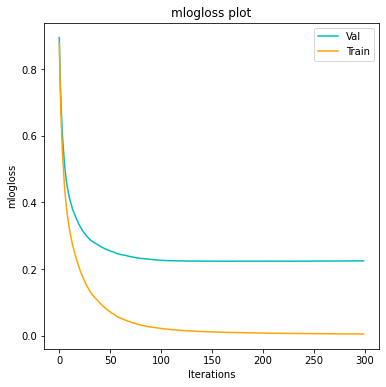

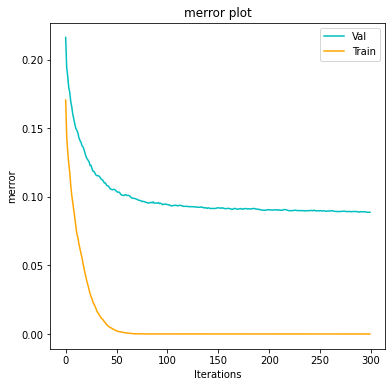

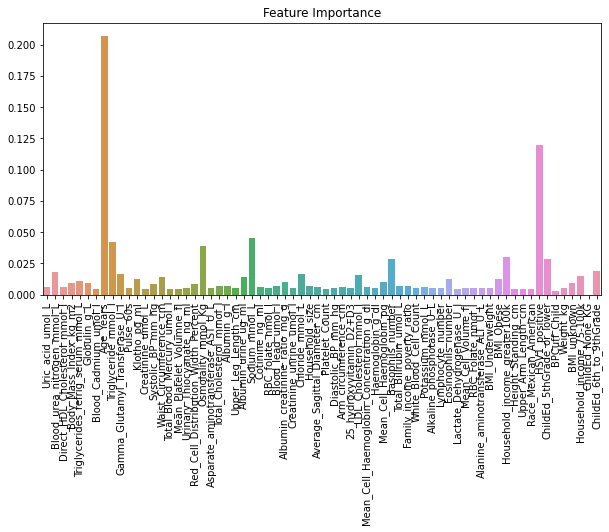

              precision    recall  f1-score   support

     class 0       0.88      0.89      0.89      8396
     class 1       0.58      0.60      0.59      2728
     class 2       0.74      0.62      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.70      0.72     12178
weighted avg       0.80      0.80      0.80     12178



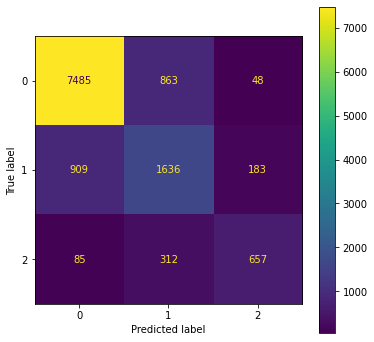

[10:21:28] ======== Monitor (0): ellpack_page ========
[10:21:28] BinningCompression: 0.004331s, 1 calls @ 4331us

[10:21:28] InitCompressedData: 0.00014s, 1 calls @ 140us

[10:21:28] Quantiles: 0.009763s, 1 calls @ 9763us

[10:21:28] ======== Monitor (0): Learner ========
[10:21:28] ======== Monitor (0):  ========
[10:21:28] ======== Device 0 Memory Allocations:  ========
[10:21:28] Peak memory usage: 139MiB
[10:21:28] Number of allocations: 2235694
[10:21:28] ======== Monitor (0):  ========
[10:21:28] ======== NCCL Statistics========
[10:21:28] AllReduce calls: 0
[10:21:28] AllReduce total MiB communicated: 0


In [ ]:
xgb5 = xgb.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed,
    max_depth= 9, 
    min_child_weight= 1,
    reg_alpha = 1,
    colsample_bytree= 0.9,
    colsample_by_level = 0.7,
    eval_metric=["mlogloss", "auc"], 
    objective = 'multi:softprob',
    num_class = 3,
    verbosity = 3
)

fitXgb(xgb5, training_data)

In [ ]:
%%time

param_test5 = {
 'max_depth':range(7, 16,2),
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch5 = GridSearchCV(estimator = xgb5, param_grid = param_test5, scoring='f1_micro',n_jobs=4,verbose = 10, cv=5)
gsearch5.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 4/5] END .........colsample_bytree=0.7;, score=0.904 total time=  38.8s
[10:26:27] ======== Monitor (0): Learner ========
[10:26:27] Configure: 0.000284s, 1 calls @ 284us

[10:26:27] ======== Monitor (0): GBTree ========
[10:26:27] ======== Device 0 Memory Allocations:  ========
[10:26:27] Peak memory usage: 136MiB
[10:26:27] Number of allocations: 2607873
[10:26:27] ======== Monitor (0): updater_gpu_hist ========
[10:26:27] ======== NCCL Statistics========
[10:26:27] AllReduce calls: 0
[10:26:27] AllReduce total MiB communicated: 0
[CV 4/5; 4/5] START colsample_bytree=0.7........................................
[10:26:27] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:26:27] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_by_level" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_by_level=0.7,
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.9,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric=['mlogloss', 'auc'], gamma=0,
                                     gpu_id=0, grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=9, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0, num_class=3,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', ...),
             n_jobs=4, param_grid={'max_depth': range(7, 16, 2)},
             scoring='f1_micro', verbose=10)

In [ ]:
getTrainScores(gsearch5)

({0: "mean:0.8939681752730765params{'max_depth': 7}",
  1: "mean:0.9025976380811878params{'max_depth': 9}",
  2: "mean:0.9030019054308873params{'max_depth': 11}",
  3: "mean:0.9021055219810303params{'max_depth': 13}",
  4: "mean:0.9010158601598757params{'max_depth': 15}"},
 {'best_mean': 0.9030019054308873, 'best_param': {'max_depth': 11}})

[10:34:22] EvalOneIter: 0.0013s, 100 calls @ 1300us

[10:34:22] GetGradient: 0.050568s, 100 calls @ 50568us

[10:34:22] PredictRaw: 0.000698s, 100 calls @ 698us

[10:34:22] UpdateOneIter: 91.2691s, 100 calls @ 91269056us

[10:34:22] ======== Monitor (0): GBTree ========
[10:34:22] BoostNewTrees: 91.2144s, 100 calls @ 91214377us

[10:34:22] CommitModel: 0.000174s, 100 calls @ 174us

[10:34:22] ======== Device 0 Memory Allocations:  ========
[10:34:22] Peak memory usage: 1033MiB
[10:34:22] Number of allocations: 4880662
[10:34:22] ======== Monitor (0): updater_gpu_hist ========
[10:34:22] InitData: 0.083707s, 300 calls @ 83707us

[10:34:22] InitDataOnce: 0.083341s, 1 calls @ 83341us

[10:34:22] Update: 90.6328s, 300 calls @ 90632841us

[10:34:22] UpdatePredictionCache: 0.432178s, 300 calls @ 432178us

[10:34:22] ======== NCCL Statistics========
[10:34:22] AllReduce calls: 97691
[10:34:22] AllReduce total MiB communicated: 16307
[10:34:22] ======== Monitor (0): gradient_based_sampler ====

Fitting model...
[10:41:56] DEBUG: ../src/tree/updater_gpu_hist.cu:817: [GPU Hist]: Configure
[10:41:56] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_by_level" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:41:56] ======== Monitor (0): SketchContainer ========
[10:41:56] MakeCuts: 0.00032s, 1 calls @ 320us

[10:41:56] Prune: 0.000199s, 1 calls @ 199us

[10:41:56] ScanInput: 0.000535s, 1 calls @ 535us

[10:41:56] Unique: 0.000139s, 1 calls @ 139us

[10:42:09] ======== Monitor (0): Learner ========
[10:42:09] Configure: 0.000404s, 1 calls @ 404us

[10:42:09] EvalOneIter: 0.001133s, 100 calls @ 1133us

[10:42:09] GetGradient: 0.004226s, 100 calls @ 4226us

[10:42:09] PredictRaw: 0.005872s, 100 calls @ 5872us

[10:42:09] UpdateOneIter

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[0]	val-mlogloss:0.88057	val-merror:0.19899	train-mlogloss:0.84893	train-merror:0.12109
[100]	val-mlogloss:0.22817	val-merror:0.09364	train-mlogloss:0.01140	train-merror:0.00000
[200]	val-mlogloss:0.22664	val-merror:0.08979	train-mlogloss:0.00586	train-merror:0.00000
[299]	val-mlogloss:0.22739	val-merror:0.08853	train-mlogloss:0.00469	train-merror:0.00000
[10:42:29] ======== Monitor (0): Learner ========
[10:42:29] Configure: 0.000347s, 1 calls @ 347us

[10:42:29] EvalOneIter: 0.173692s, 300 calls @ 173692us

[10:42:29] GetGradient: 0.010142s, 300 calls @ 10142us

[10:42:29] PredictRaw: 0.000697s, 300 calls @ 697us

[10:42:29] UpdateOneIter: 19.3238s, 300 calls @ 19323770us

[10:42:29] ======== Monitor (0): GBTree ========
[10:42:29] BoostNewTrees: 19.306s, 300 calls @ 19305973us

[10:42:29] CommitModel: 0.000411s, 300 calls @ 411us

[10:42:29] ======== Device 0 Memory Allocations:  ========
[10:42:29] Peak memory usage: 524MiB
[10:42:29] Number of allocations: 4226307
[10:42:29] =====

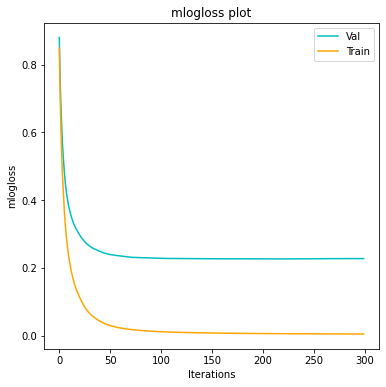

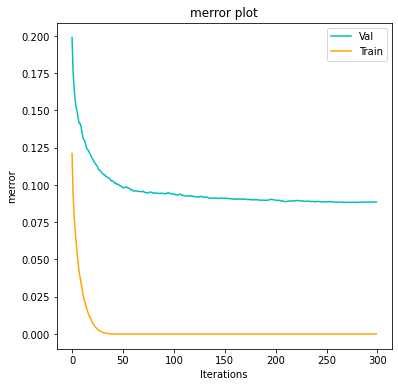

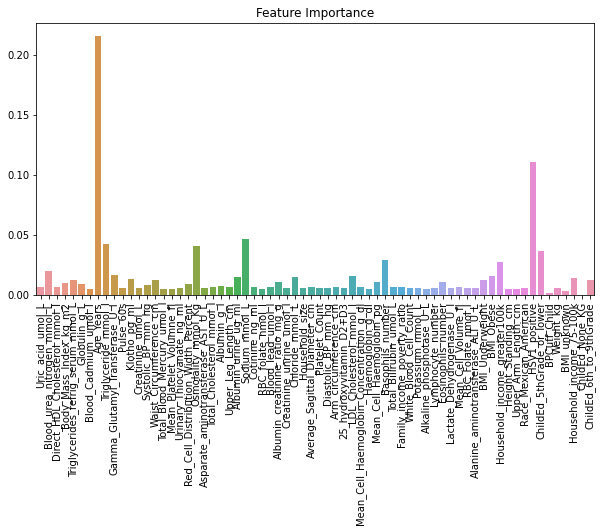

              precision    recall  f1-score   support

     class 0       0.88      0.89      0.89      8396
     class 1       0.58      0.60      0.59      2728
     class 2       0.75      0.63      0.69      1054

    accuracy                           0.80     12178
   macro avg       0.74      0.71      0.72     12178
weighted avg       0.80      0.80      0.80     12178



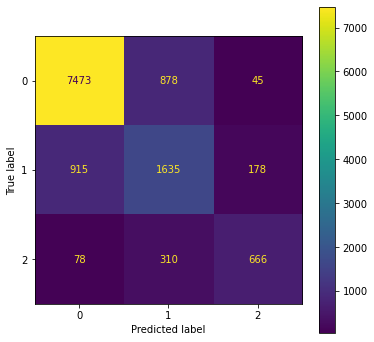

[10:42:30] ======== Monitor (0): ellpack_page ========
[10:42:30] BinningCompression: 0.004167s, 1 calls @ 4167us

[10:42:30] InitCompressedData: 0.000138s, 1 calls @ 138us

[10:42:30] Quantiles: 0.009976s, 1 calls @ 9976us

[10:42:30] ======== Monitor (0): Learner ========
[10:42:30] ======== Monitor (0):  ========
[10:42:30] ======== Device 0 Memory Allocations:  ========
[10:42:30] Peak memory usage: 524MiB
[10:42:30] Number of allocations: 4226308
[10:42:30] ======== Monitor (0):  ========
[10:42:30] ======== NCCL Statistics========
[10:42:30] AllReduce calls: 0
[10:42:30] AllReduce total MiB communicated: 0


In [ ]:
xgb6 = xgb.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed,
    max_depth= 11, 
    min_child_weight= 1,
    reg_alpha = 1,
    colsample_bytree= 0.9,
    colsample_by_level = 0.7,
    eval_metric=["mlogloss", "auc"], 
    objective = 'multi:softprob',
    num_class = 3,
    verbosity = 3
)

fitXgb(xgb6, training_data)

In [ ]:
joblib.dump(xgb4, 'xgb_colsampletune.joblib')


['xgb_colsampletune.joblib']